# Nilearn Reporting

In this notebook we will focus on the reporting capabilities of Nilearn. 

More precisely, the objective is to talk about the following topics:

- <a href="#whatis">What do you expect from reports and how do you think it can help your research activities?</a>
- <a href="#current">What are the current reporting capabilities of Nilearn?</a>
    - <a href="#niftimasker">NiftiMasker reports</a>
    - <a href="#glm">GLM reports</a>
- <a href="#useful">Is current reporting useful for you?</a>
- <a href="#dev">What are the reporting capabilities currently under development?</a>
    - <a href="#niftilabelsmasker">NiftiLabelsMasker reports</a>
    - <a href="#niftimapsmasker">NiftiMapsMasker reports</a>
    - <a href="#othermaskers">Reports for other maskers</a>
    - <a href="#decoder">Decoder maskers</a>
- <a href="#next">What should we aim for in terms of reporting?</a>

<div class="alert alert-block alert-info">
<b>Tip:</b> All these questions are intended as discussions rather than demonstrations. Our objective is to make nilearn a better tool suited to the needs of its users. So feel free to give your opinion here!</div>

<span id="whatis"></span>

## What do you expect from reports and how do you think it can help your research activities?

Please think about this, all inputs are welcome here!

- ...
- ...

<span id="current"></span>

## What are the current reporting capabilities of Nilearn?

In this section, we will review the reporting capabilities currently implemented in nilearn 0.7.1.

<span id="niftimasker"></span>

### NiftiMasker report


Let's say we have some fMRI data and we want to extract signals for voxels inside the brain. This is a standard operation in Nilearn usually done through a masker:

In [1]:
# Get fMRI data
from nilearn import datasets
dataset = datasets.fetch_development_fmri(n_subjects=1)

/home/nicolas/GitRepos/nilearn-fork/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


We instantiate and fit a `NiftiMasker` object such as to remove the background voxels from our data:

In [2]:
from nilearn.input_data import NiftiMasker

masker = NiftiMasker(standardize=True, 
                     mask_strategy='background')
masker.fit(dataset.func[0])

NiftiMasker(standardize=True)

At this point, we can get the signals using the `transform` method of the masker. But it can be useful to double check the mask computation before doing so. One way to visualy check this is through the report which can be computed thanks to the `generate_report` method of the `NiftiMasker`:

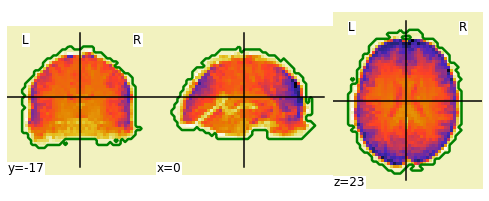

In [3]:
# Make report
report = masker.generate_report()
report

The report can be displayed directly in the notebook like what is done above, or saved to an html file:

In [4]:
# Save report to html file
report.save_as_html('nifti-report.html')

The report enables the user to visualy checks that the mask computation ran as expected as well as a way to "freeze" the masker object and save its configuration to disk which could be useful when experimenting different parameters combinations.

Here is an example where we "forgot" to provide an image to `fit`:

In [5]:
haxby_dataset = datasets.fetch_haxby()
masker = NiftiMasker(mask_img=haxby_dataset.mask_vt[0])
masker.fit()

NiftiMasker(mask_img='/home/nicolas/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz')

We generating the report, we get a hard-to-miss warning together with a weird looking report which should draw our atttention to our mistake above:

/home/nicolas/GitRepos/nilearn-fork/nilearn/input_data/nifti_masker.py:300: UserWarning: No image provided to fit in NiftiMasker. Setting image to mask for reporting.
  warnings.warn(msg)


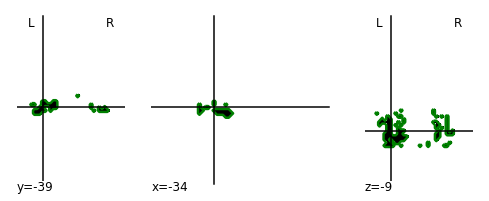

In [6]:
report = masker.generate_report()
report

<span id="glm"></span>

### GLM report

Reports also exist for Generalized Linear Models in nilearn. 

We consider the same example as for the introduction/whatsnew session on GLMs:

In [7]:
# Get data
from nilearn.datasets import func
data = func.fetch_localizer_first_level()
fmri_img = data.epi_img

In [8]:
# Get the event file
import pandas as pd
events_file = data['events']
events = pd.read_table(events_file)
events.head(3)

Unnamed: 0  Unnamed: 0.1               trial_type  onset  duration
0           0             0       visual_computation    0.0       1.0
1           1             1       visual_computation    2.4       1.0
2           2             2  horizontal_checkerboard    8.7       1.0

In [9]:
# Create and fit the model
from nilearn.glm.first_level import FirstLevelModel
first_level_model = FirstLevelModel(t_r=2.4, 
                                    high_pass=.01)

In [10]:
first_level_model = first_level_model.fit(fmri_img, 
                                          events=events)

/home/nicolas/GitRepos/nilearn-fork/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column `Unnamed: 0.1` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/home/nicolas/GitRepos/nilearn-fork/nilearn/glm/first_level/experimental_paradigm.py:88: UserWarning: Unexpected column `Unnamed: 0` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "


In [11]:
# Define the contrast
contrasts = {'left - right button press':
                'audio_left_hand_button_press '
                '- audio_right_hand_button_press '
                '+ visual_left_hand_button_press '
                '- visual_right_hand_button_press'}

Make the report:

In [12]:
from nilearn.reporting import make_glm_report
report = make_glm_report(first_level_model, 
                         contrasts)
report

/home/nicolas/GitRepos/nilearn-fork/nilearn/reporting/utils.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.savefig(


As for the NiftiMasker reports, the GLM reports can be displayed in the notebook or saved to an html file:

In [13]:
report.save_as_html('glm-report.html')

<span id="useful"></span>

## Is current reporting useful for you?

Let's pause here and think about whether these reports are useful the way they currently are.

**Comments / suggestions ??**

*Take notes here...*

<span id="dev"></span>

## What are the reporting capabilities currently under development?

In this section we have a look at reporting features that are currently under development, which concerns mostly masker reports. There is an ongoing discussion on GitHub on this topic [here](https://github.com/nilearn/nilearn/issues/2689).

<div class="alert alert-block alert-danger">
<b>Danger:</b> As these haven't been released yet, you won't be able to run the cells yourself!
</div>

<span id="niftilabelsmasker"></span>

### NiftiLabelsMasker

See this pull request [here](https://github.com/nilearn/nilearn/pull/2707).

Here is an example:

In [14]:
# Get fmri data and atlas
from nilearn.datasets import (fetch_atlas_harvard_oxford,
                              fetch_development_fmri)

atlas = fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
data  = fetch_development_fmri(n_subjects=1)

In [15]:
# Instanciate and fit a NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas.maps,
                           labels=atlas.labels)
masker.fit(data.func[0])

NiftiLabelsMasker(labels=['Background', 'Frontal Pole', 'Insular Cortex',
                          'Superior Frontal Gyrus', 'Middle Frontal Gyrus',
                          'Inferior Frontal Gyrus, pars triangularis',
                          'Inferior Frontal Gyrus, pars opercularis',
                          'Precentral Gyrus', 'Temporal Pole',
                          'Superior Temporal Gyrus, anterior division',
                          'Superior Temporal Gyrus, posterior division',
                          'Middle Temporal Gyrus, anterior division',
                          'Mi...
                          'Lateral Occipital Cortex, superior division',
                          'Lateral Occipital Cortex, inferior division',
                          'Intracalcarine Cortex', 'Frontal Medial Cortex',
                          'Juxtapositional Lobule Cortex (formerly '
                          'Supplementary Motor Cortex)',
                          'Subcallosal Cortex', 'P

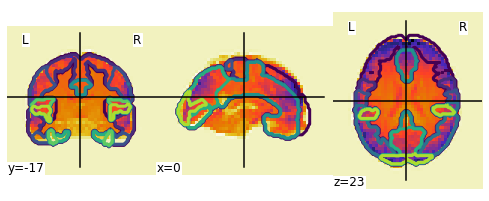

In [16]:
# Generate a report, exactly like we 
# would do for the NiftiMasker
report = masker.generate_report()
report

Here is the case where the user forgot to provide an image to `fit`:

/home/nicolas/GitRepos/nilearn-fork/nilearn/input_data/nifti_labels_masker.py:287: UserWarning: No image provided to fit in NiftiLabelsMasker. Plotting ROI of label image for reporting.
  warnings.warn(msg)


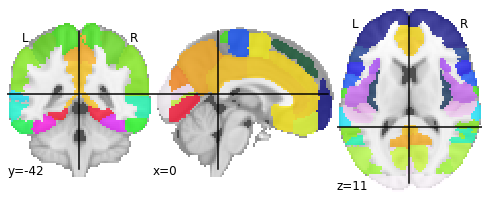

In [17]:
masker = NiftiLabelsMasker(labels_img=atlas.maps,
                           labels=atlas.labels)
masker.fit()
report = masker.generate_report()
report

**Comments / suggestions ??**

*Take notes here...*

<span id="niftimapsmasker"></span>

### NiftiMapsMasker

Here is an example using the MSDL atlas:

/home/nicolas/anaconda3/envs/nilearn/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/home/nicolas/GitRepos/nilearn-fork/nilearn/plotting/displays.py:666: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figure, figsize=figsize,


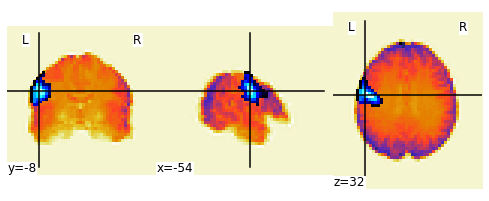

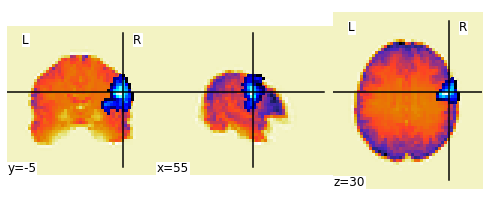

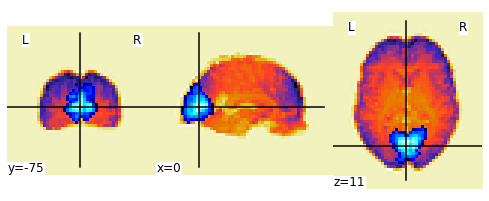

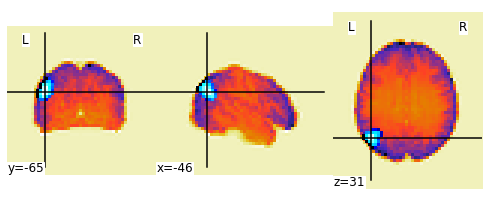

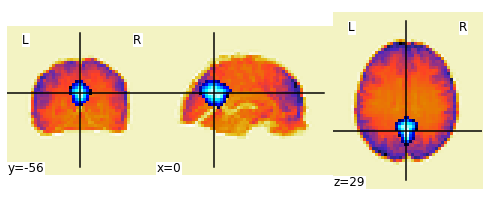

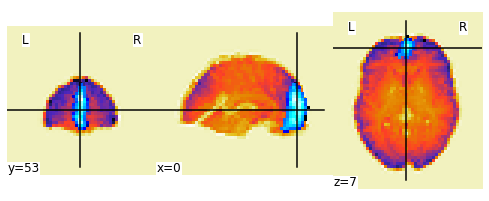

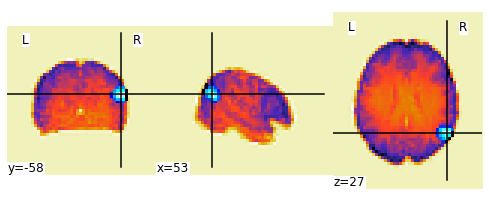

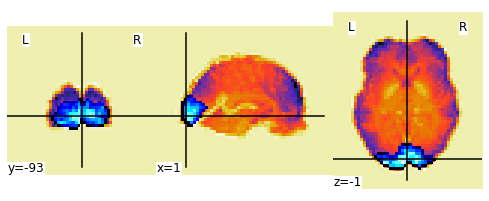

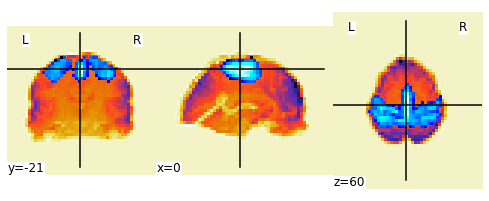

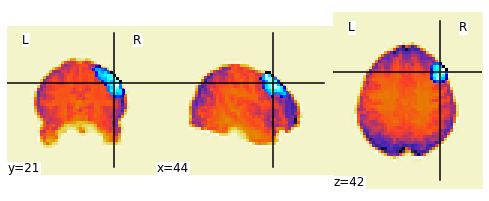

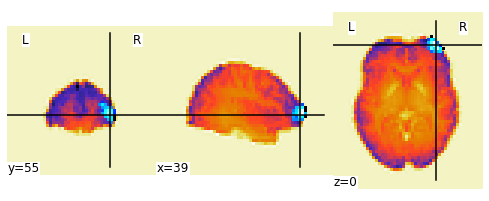

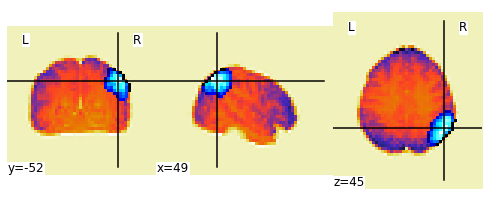

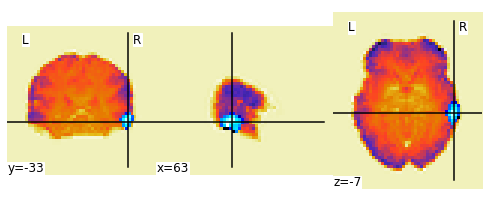

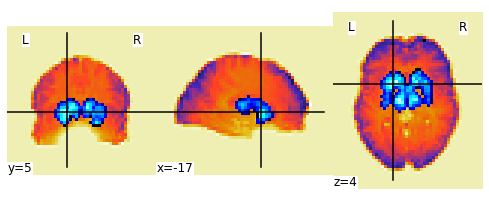

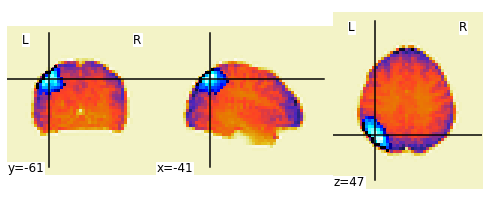

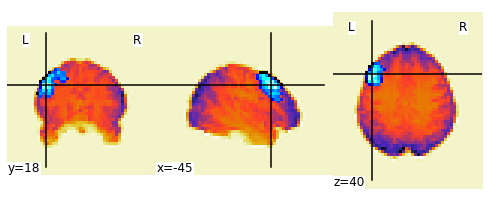

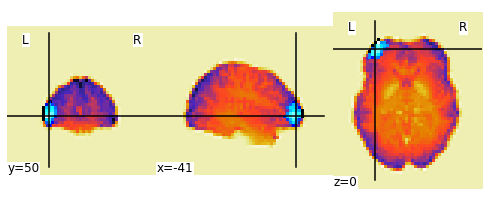

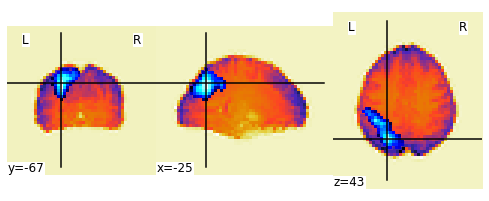

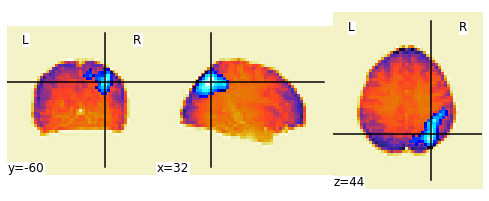

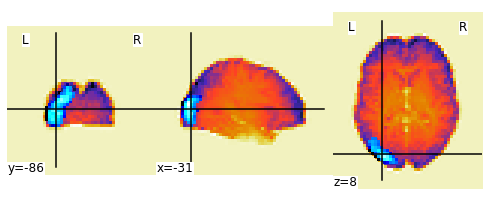

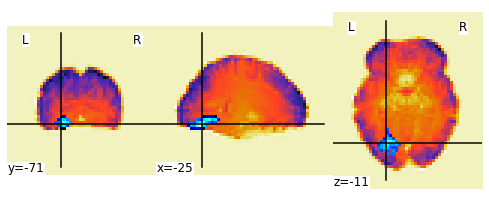

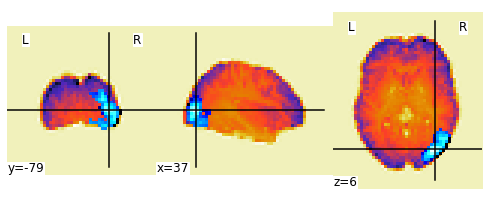

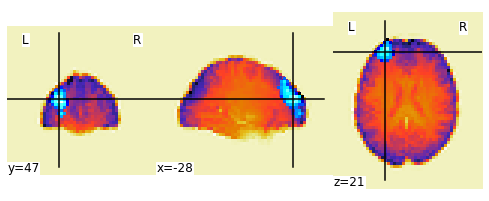

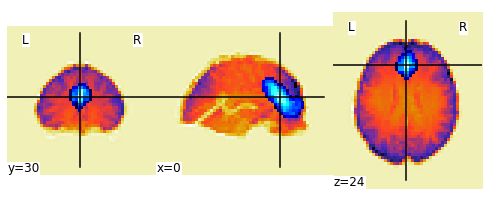

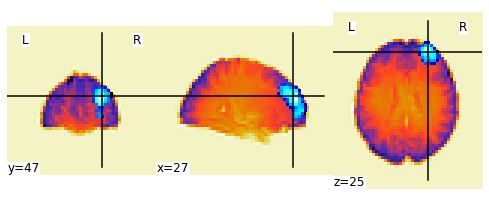

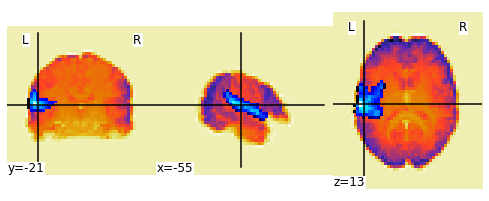

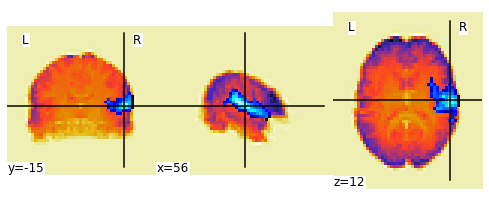

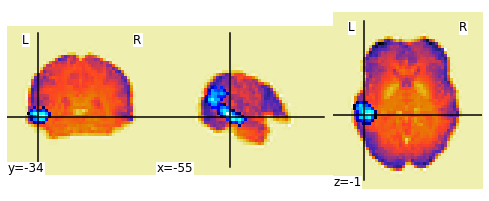

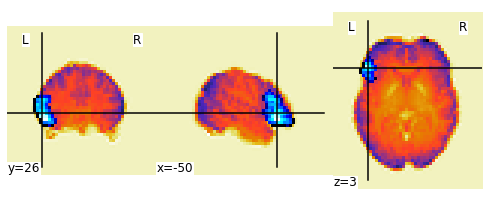

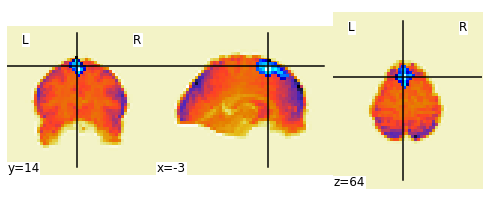

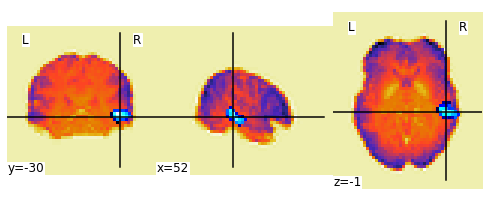

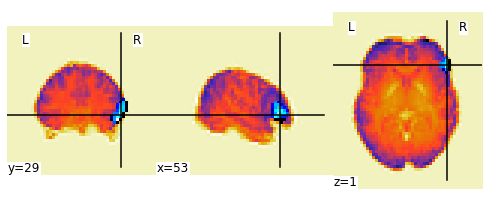

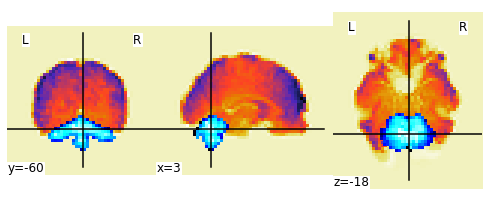

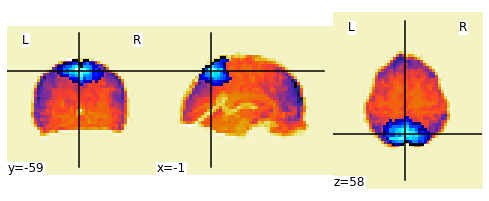

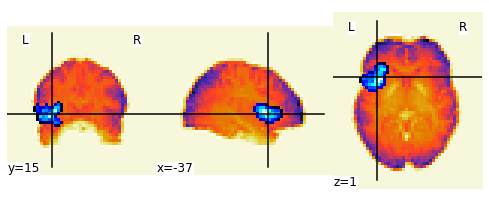

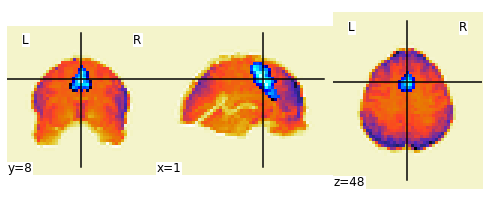

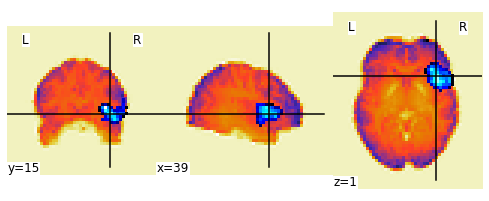

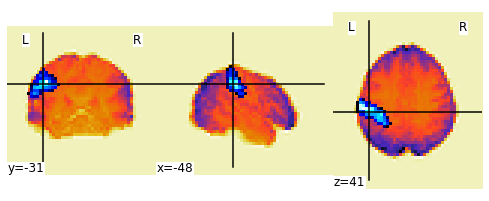

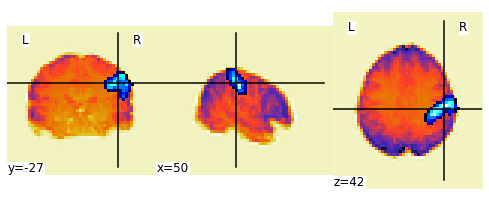

In [18]:
from nilearn.datasets import fetch_atlas_msdl
from nilearn.input_data import NiftiMapsMasker

msdl = fetch_atlas_msdl()
data = fetch_development_fmri(n_subjects=1)
masker = NiftiMapsMasker(maps_img=msdl.maps)
masker.fit(data.func[0])
report = masker.generate_report()
report

and without proving an image to `fit`:

/home/nicolas/GitRepos/nilearn-fork/nilearn/input_data/nifti_maps_masker.py:247: UserWarning: No image provided to fit in NiftiMapsMasker. Plotting only spatial maps for reporting.
  warnings.warn(msg)


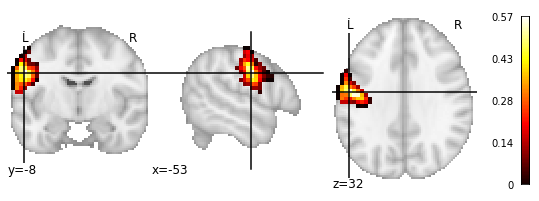

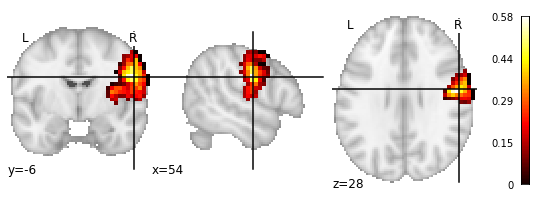

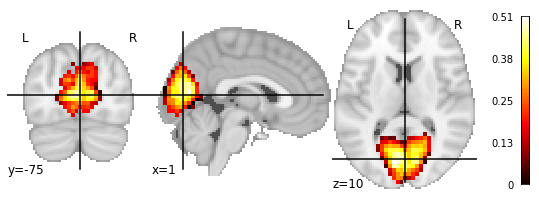

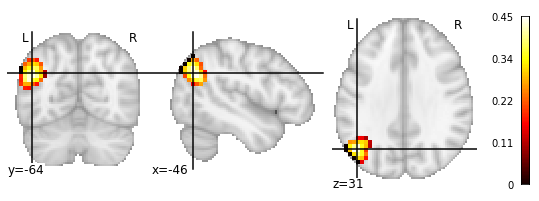

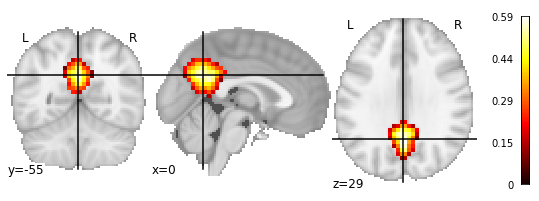

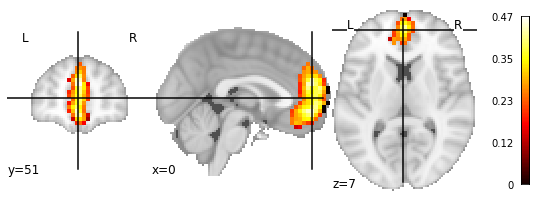

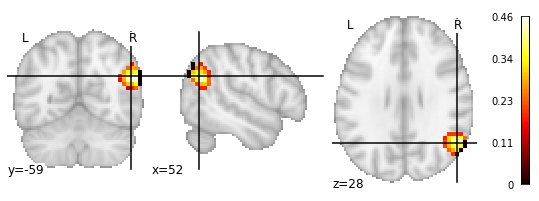

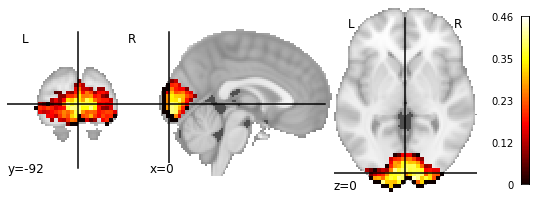

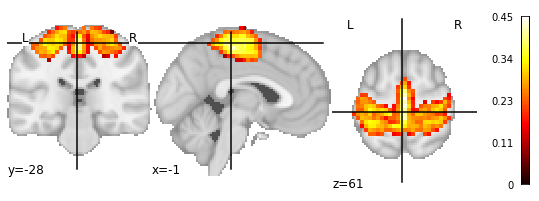

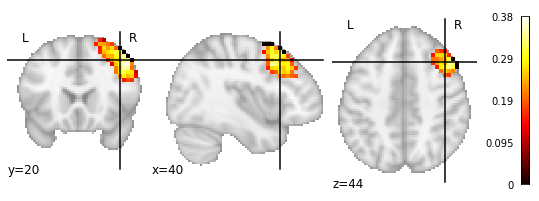

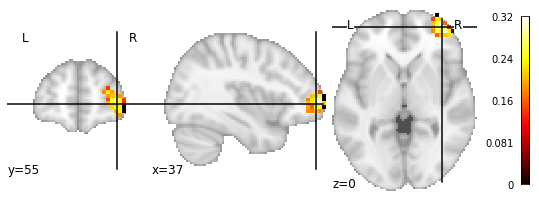

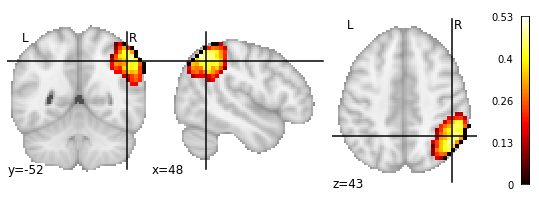

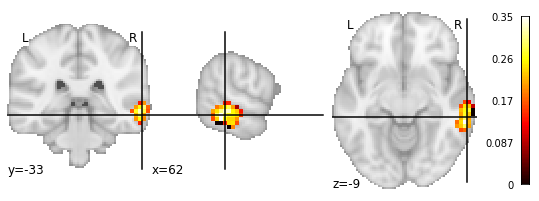

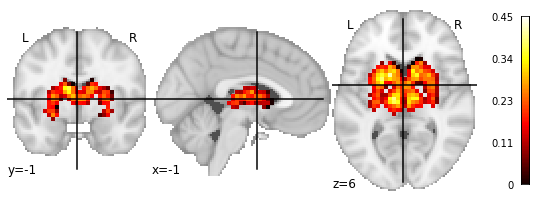

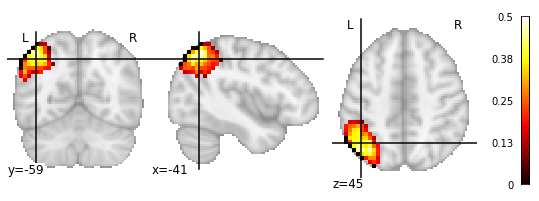

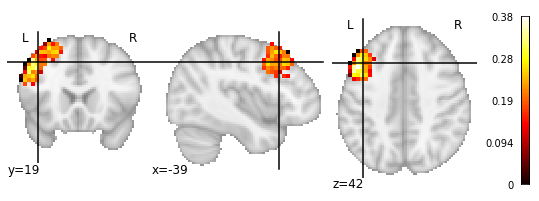

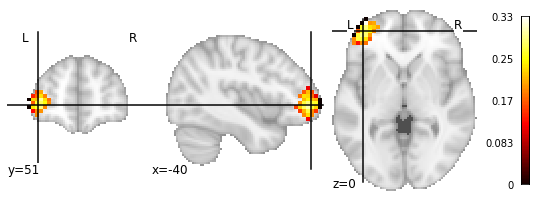

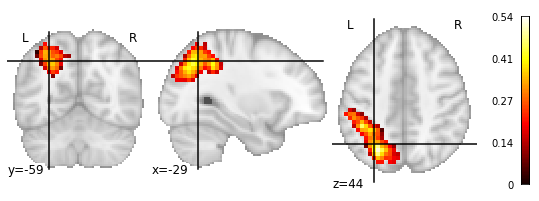

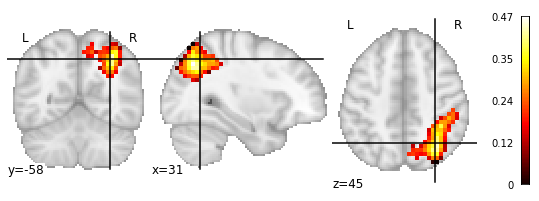

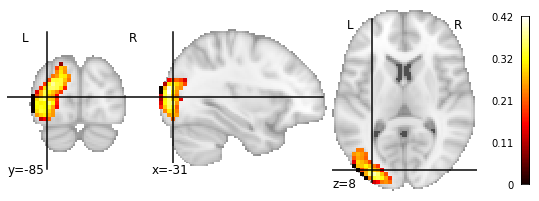

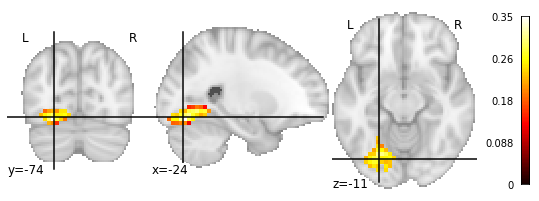

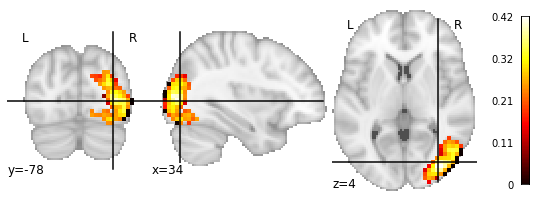

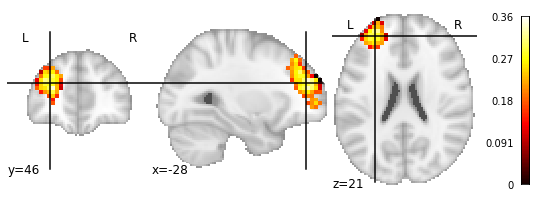

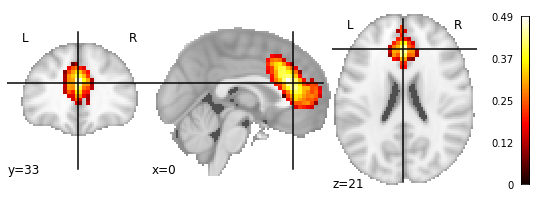

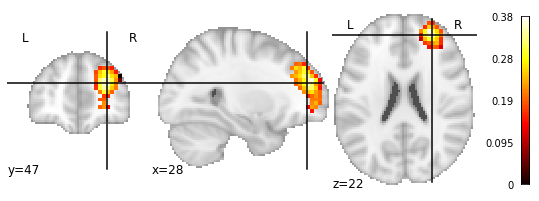

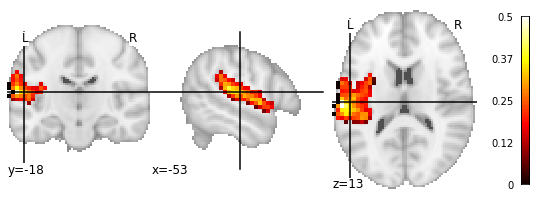

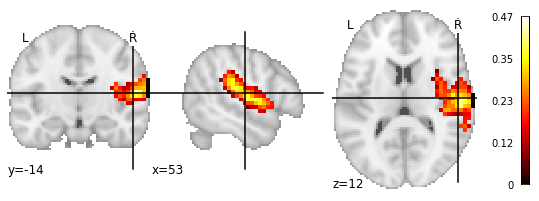

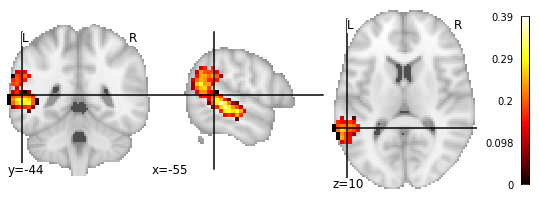

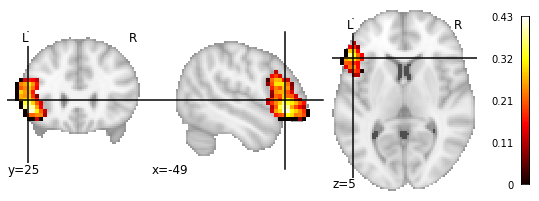

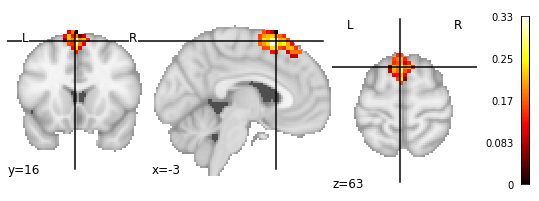

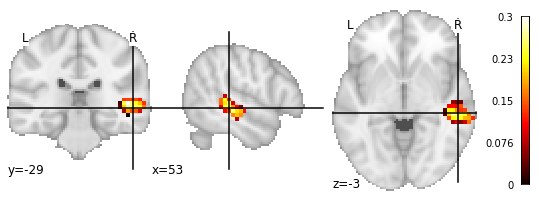

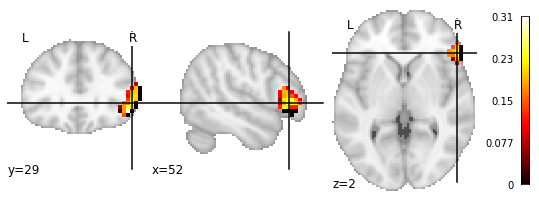

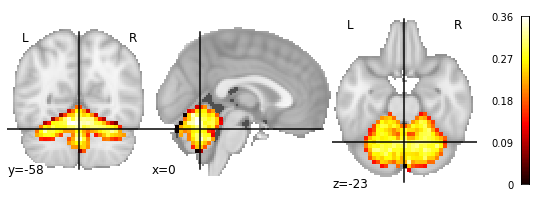

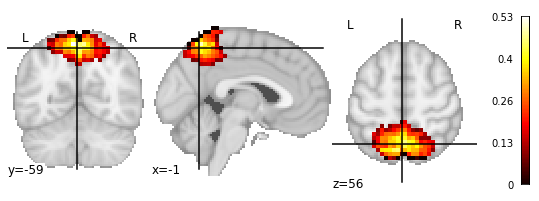

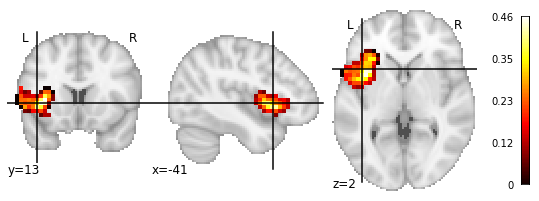

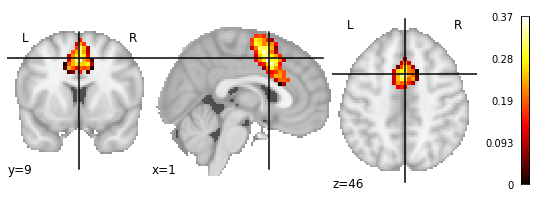

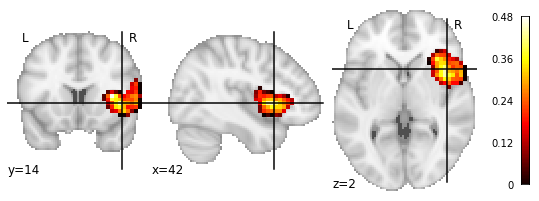

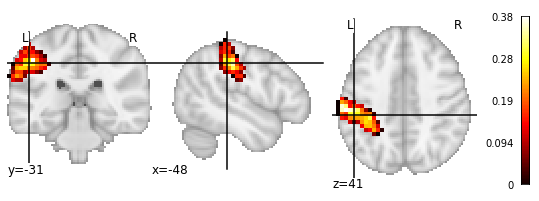

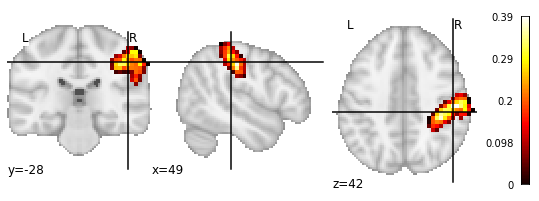

In [19]:
masker = NiftiMapsMasker(maps_img=msdl.maps)
masker.fit()
report = masker.generate_report()
report

**Comments / suggestions ??**

*Take notes here...*

<span id="othermaskers"></span>

### Reports for other maskers

#### NiftiSphereMasker

**Comments / suggestions ??**

*Take notes here...*

#### MultiNiftiMasker

**Comments / suggestions ??**

*Take notes here...*

<span id="decoder"></span>

### Decoder reports

**Comments / suggestions ??**

*Take notes here...*

<span id="next"></span>

## What should we aim for in terms of reporting?

Here is a list of potential axes of development I could think of. Feel free to suggest!

- add information ?
- remove some information ?
- style ?
- interactivity ?